In [45]:
import pandas as pd
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
import imblearn
from collections import Counter
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

In [56]:
train=pd.read_table('bio_train.dat',header=None)

In [52]:
test_final=pd.read_table('bio_test.dat',header=None)

In [7]:
column_names = ["V" + suit for suit in [str(x) for x in list(range(0,77))]]


In [53]:
column_names = ["V" + suit for suit in [str(x) for x in list(range(0,77))]]


In [57]:
train.columns=column_names

In [58]:
test_final.columns=column_names

In [11]:
test_final.V0=pd.Categorical(test_final.V0)

In [12]:
train.V0=pd.Categorical(train.V0)

In [13]:
train_list=list(train.V0.values)

In [59]:
test_final_list=list(test_final.V0.values)

In [15]:
pred=[]

In [79]:
sub_only_block279=train[train.V0==279]

(array([  1.,   1.,   2.,  17.,  28., 114., 195., 261., 158.,  28.]),
 array([-115.5 , -106.65,  -97.8 ,  -88.95,  -80.1 ,  -71.25,  -62.4 ,
         -53.55,  -44.7 ,  -35.85,  -27.  ]),
 <a list of 10 Patch objects>)

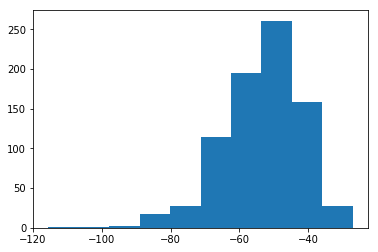

In [80]:
plt.hist(sub_only_block279.iloc[:,12])

In [403]:
df_final=pd.DataFrame()
#Blockwise operation- normalizing within each block for train set
for i in set(train_list):
    #declaring variable names on the go
    x='block_'+str(i)
    print(x)
    #subsetting each block from the training set
    vars()[x]=train[train.V0==i]
    #Normalizing data inside each block
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(vars()[x].iloc[:,3:77])
    df_normalized = pd.DataFrame(x_scaled)
    #printing size of each block and class distribution
    print(df_normalized.shape)
    print(vars()[x].V2.value_counts())
    df_final=pd.concat([df_final, df_normalized])
  #  y='model'+str(i)
   # vars()[y]=SVC(kernel='linear')
    #vars()[y].fit(df_normalized,vars()[x].V2)
    #print(classification_report(vars()[x].V2,vars()[y].predict(df_normalized)))
    #pred.append(vars()[y].support_)

block_2
(995, 74)
0    991
1      4
Name: V2, dtype: int64
block_5
(1059, 74)
0    1057
1       2
Name: V2, dtype: int64
block_7
(975, 74)
0    952
1     23
Name: V2, dtype: int64
block_8
(625, 74)
0    623
1      2
Name: V2, dtype: int64
block_9
(911, 74)
0    910
1      1
Name: V2, dtype: int64
block_12
(958, 74)
0    934
1     24
Name: V2, dtype: int64
block_13
(1101, 74)
0    1089
1      12
Name: V2, dtype: int64
block_14
(906, 74)
0    904
1      2
Name: V2, dtype: int64
block_16
(993, 74)
0    980
1     13
Name: V2, dtype: int64
block_17
(1157, 74)
0    1156
1       1
Name: V2, dtype: int64
block_18
(1114, 74)
0    1113
1       1
Name: V2, dtype: int64
block_19
(1111, 74)
0    1108
1       3
Name: V2, dtype: int64
block_23
(935, 74)
0    927
1      8
Name: V2, dtype: int64
block_24
(929, 74)
0    928
1      1
Name: V2, dtype: int64
block_25
(817, 74)
0    793
1     24
Name: V2, dtype: int64
block_27
(820, 74)
0    813
1      7
Name: V2, dtype: int64
block_29
(988, 74)
0    983
1 

In [409]:
df_final.index=list(train.index)
#train.shape

In [158]:
column_names = ["V" + suit for suit in [str(x) for x in list(range(0,74))]]
df_final.columns=column_names

(array([ 1319.,  5534., 17309., 31660., 36891., 28368., 15621.,  6416.,
         1973.,   660.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

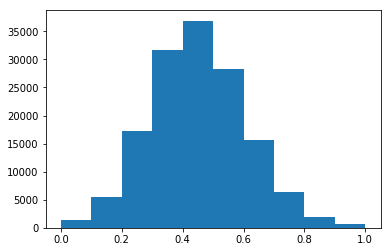

In [78]:
plt.hist(df_final.iloc[:,12])

In [106]:
df_test=pd.DataFrame()
#Blockwise operation- normalizing within each block for test set
for i in set(test_final_list):
    #declaring variable names on the go
    x='block_'+str(i)
    print(x)
    #subsetting each block from the training set
    vars()[x]=test_final[test_final.V0==i]
    #Normalizing data inside each block
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(vars()[x].iloc[:,3:77])
    df_normalized_test = pd.DataFrame(x_scaled)
    #printing size of each block and class distribution
    print(df_normalized_test.shape)
  #  print(vars()[x].V2.value_counts())
    df_test=pd.concat([df_test, df_normalized_test])

block_1
(998, 74)
block_3
(861, 74)
block_4
(916, 74)
block_6
(1032, 74)
block_10
(937, 74)
block_11
(932, 74)
block_15
(910, 74)
block_20
(1008, 74)
block_21
(1143, 74)
block_22
(850, 74)
block_26
(774, 74)
block_28
(1082, 74)
block_32
(251, 74)
block_35
(910, 74)
block_38
(256, 74)
block_40
(993, 74)
block_41
(968, 74)
block_43
(1182, 74)
block_44
(1084, 74)
block_45
(939, 74)
block_47
(920, 74)
block_49
(787, 74)
block_50
(954, 74)
block_51
(551, 74)
block_52
(1121, 74)
block_53
(1022, 74)
block_54
(1033, 74)
block_56
(882, 74)
block_58
(1155, 74)
block_63
(1008, 74)
block_68
(1232, 74)
block_70
(983, 74)
block_71
(531, 74)
block_72
(1016, 74)
block_75
(943, 74)
block_76
(749, 74)
block_79
(1058, 74)
block_82
(965, 74)
block_83
(820, 74)
block_84
(723, 74)
block_85
(1005, 74)
block_86
(615, 74)
block_87
(1034, 74)
block_88
(796, 74)
block_89
(1052, 74)
block_90
(868, 74)
block_91
(865, 74)
block_92
(973, 74)
block_93
(1120, 74)
block_94
(957, 74)
block_97
(1079, 74)
block_98
(805, 7

In [40]:
#Consider the entire dataset
#Downsample majority class
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(df_final.iloc[:,3:77], train.V2)
test=[]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_rus,y_rus, test_size=0.33, random_state=42)
...

In [45]:
test=[]
#classifier training and reporting accuracy on test data without feature selection
def test_results(X_train,y_train,X_test, y_test, test):
    classifiers = {
        "Naive Bayes"         : GaussianNB(),
        "Gradient Boost"      : GradientBoostingClassifier(),
        "Adaboost"            : AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
        "Decision Tree"       : DecisionTreeClassifier(),
        "Extra Random Trees"  : ExtraTreesClassifier(n_estimators=300),
        "Logistic Regression" : LogisticRegression(),
        "K-Nearest-Neighbors" : KNeighborsClassifier(),
        "SVM"                 : LinearSVC(),
        "Random Forest"       : RandomForestClassifier(n_estimators=300)
    }
    
    for i in classifiers:
        # cross validation
        print(i)
        model=classifiers[i].fit(X_train,y_train)
        test.append(accuracy_score(y_test,model.predict(X_test)))
        print(accuracy_score(y_test,model.predict(X_test)))
    
    return test

In [42]:
test_results(X_train,y_train,X_test,y_test,test)

Naive Bayes
0.5035046728971962
Gradient Boost
0.5210280373831776
Adaboost
0.5046728971962616
Decision Tree
0.5046728971962616
Extra Random Trees
0.5852803738317757
Logistic Regression
0.5116822429906542
K-Nearest-Neighbors


/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5233644859813084
SVM
0.5046728971962616
Random Forest
0.5572429906542056


[0.5035046728971962,
 0.5210280373831776,
 0.5046728971962616,
 0.5046728971962616,
 0.5852803738317757,
 0.5116822429906542,
 0.5233644859813084,
 0.5046728971962616,
 0.5572429906542056]

In [43]:
#using SMOTE on entire data
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(df_final.iloc[:,3:77], train.V2)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_sm,y_sm, test_size=0.33, random_state=42)
...

In [46]:
test_results(X_train,y_train,X_test,y_test,test)

Naive Bayes
0.6348160812242372
Gradient Boost
0.7860731479636253
Adaboost
0.7009995699646532
Decision Tree
0.9375085220419337
Extra Random Trees
0.9998426699950703
Logistic Regression


/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5916132618705489
K-Nearest-Neighbors
0.8366914548829989
SVM
0.592357957227216
Random Forest
0.9989511333004688


[0.6348160812242372,
 0.7860731479636253,
 0.7009995699646532,
 0.9375085220419337,
 0.9998426699950703,
 0.5916132618705489,
 0.8366914548829989,
 0.592357957227216,
 0.9989511333004688]

In [47]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
pred=rf.predict(df_test.iloc[:,3:77]) #results 130

In [56]:
def results_upload(pred,file):
    prediction=pd.DataFrame(test_final.V0)
    prediction['V1']=test_final.V1
    prediction['V2']=pred
    prediction.to_csv(file, header=None, index=None, sep=' ', mode='a')


In [59]:
et=ExtraTreesClassifier()
et.fit(X_train,y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [69]:
pred=et.predict(df_test.iloc[:,3:77])

In [70]:
results_upload(pred,'smote_extra_trees.txt') #rank: 128

In [64]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [67]:
pred=ada.predict(df_test.iloc[:,3:77])

In [68]:
results_upload(pred,'smote_adaboost_trees.txt') #rank:136

In [72]:
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)

In [73]:
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
pred=clf.predict(df_test.iloc[:,3:77])

In [75]:
results_upload(pred,'SGDclassifier.txt') #rank:136

The best smote result was rank 128 using extra trees. So it is evident we have to deal with the class imbalance in some different ways. Now some intrablock models will be explored. 

In [473]:
pos_eg=df_final.loc[train.V2==1]
pos_eg.shape

(1296, 74)

In [526]:
model_first_Set=SVC(kernel='rbf')

In [570]:
model.fit(tenth_df,label_tenth_set)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [571]:
prediction=pd.DataFrame(test_final.V0)


In [572]:
prediction['V0']=test_final.V0

In [573]:
prediction['V1']=test_final.V1

In [574]:
prediction['V2']=model.predict(df_test)

In [577]:
prediction.to_csv(r'grsvm4.txt', header=None, index=None, sep=' ', mode='a') #Rank 127


Now applying SMOTE on the above reduced training set

In [581]:
#size of the traning set and class distribution
tenth_df.shape


(49626, 74)

In [590]:
Counter(label_tenth_set)

Counter({1: 1296, 0: 48330})

In [591]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(tenth_df, label_tenth_set)

In [592]:
model.fit(X_sm,y_sm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [593]:
prediction['V2']=model.predict(df_test)

In [594]:
prediction.to_csv(r'smote_grsvm4.txt', header=None, index=None, sep=' ', mode='a')  #rank 137


In [595]:
Counter(prediction.V2)

Counter({1: 62903, 0: 76755})

In [8]:
rdata=pd.read_table('cleaned_svm.txt')

In [9]:
labels=rdata.V3

In [10]:
del rdata['V1']
del rdata['V2']
del rdata['V3']

In [101]:
model=KNeighborsClassifier().fit(rdata,labels)

In [103]:
originalclass = []
predictedclass = []

# Non_nested parameter search and scoring
# Nested CV with parameter optimization
nested_score = cross_val_score(model, rdata, labels, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))
# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass))
print(confusion_matrix(originalclass,predictedclass))
print(accuracy_score(originalclass,predictedclass))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     21868
           1       0.95      0.72      0.82      1296

   micro avg       0.98      0.98      0.98     23164
   macro avg       0.97      0.86      0.91     23164
weighted avg       0.98      0.98      0.98     23164

[[21824    44]
 [  364   932]]
0.9823864617509929


In [42]:
test_data=pd.read_table('test_cleaned_svm_data.txt')


In [108]:
pred=eclf1.predict(test_data)

In [99]:
def results_upload(pred,file):
    prediction=pd.DataFrame(test_final.V0)
    prediction['V1']=test_final.V1
    prediction['V2']=pred
    prediction.to_csv(file, header=None, index=None, sep=' ', mode='a')


In [109]:
results_upload(pred,'blockwise_svm_et_ensemble_final.txt')

In [79]:
pred=[]

In [107]:
svm=SVC(kernel='rbf')
et=ExtraTreesClassifier()
eclf1 = VotingClassifier(estimators=[('et', et), ('svm', svm)], voting='hard')
eclf1 = eclf1.fit(rdata,labels)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
RF=RandomForestClassifier()
RF.fit(rdata,labels)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
importances = list(RF.feature_importances_)
x_values = list(range(len(importances)))
col=[ 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60',
       'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70',
       'V71', 'V72', 'V73', 'V74', 'V75', 'V76']

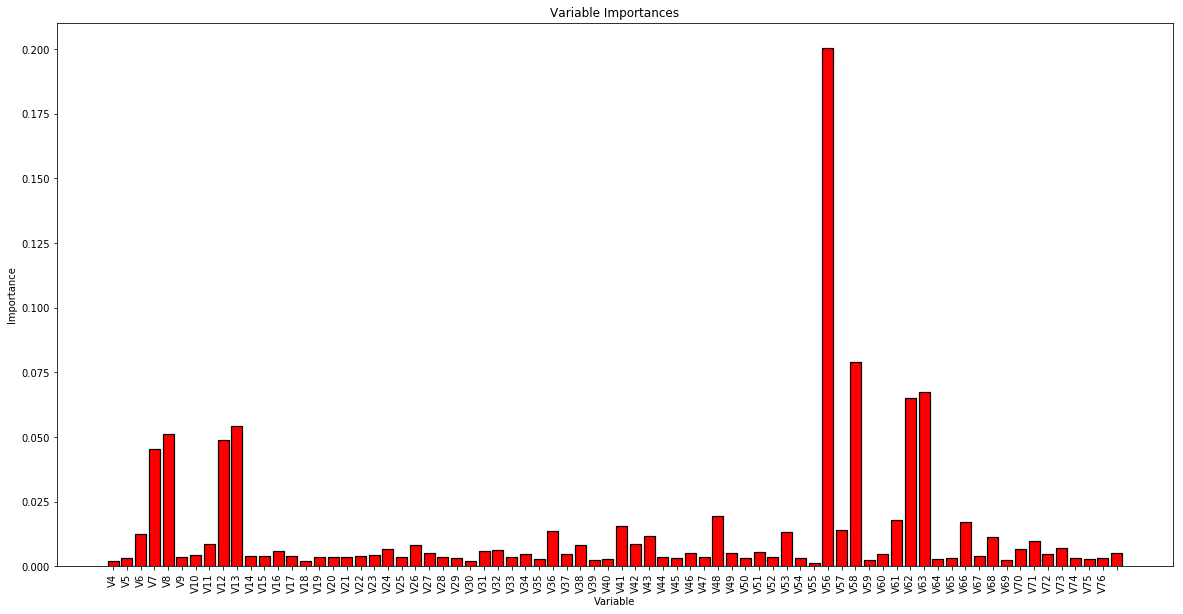

In [115]:
f = plt.figure(figsize=(20,10))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, col, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');